# ABS Quarterly Wage Price Index 6345

Note: the WPI follows price changes in a fixed "basket" of jobs.

## Python set-up

In [1]:
# system imports
import sys
import re

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from abs_data_capture import (
    get_fs_constants,
    get_meta_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
    clear_cache,
)
from plotting import (
    finalise_plot,
    set_chart_dir,
    clear_chart_dir,
    plot_growth_finalise,
    calc_growth,
    line_plot,
)

# pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

# display charts in this notebook
SHOW = True

## Get data from ABS

In [2]:
if False:
    clear_cache()

In [3]:
catalogue_id = "6345"
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

abs_dict = get_ABS_meta_and_data(catalogue_id)
if abs_dict is None:
    sys.exit(-1)

meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)
did_col, id_col, table_col, type_col, unit_col = get_meta_constants()

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot

### Set up

In [4]:
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)

plt.style.use("fivethirtyeight")

### Headline WPI for Australia

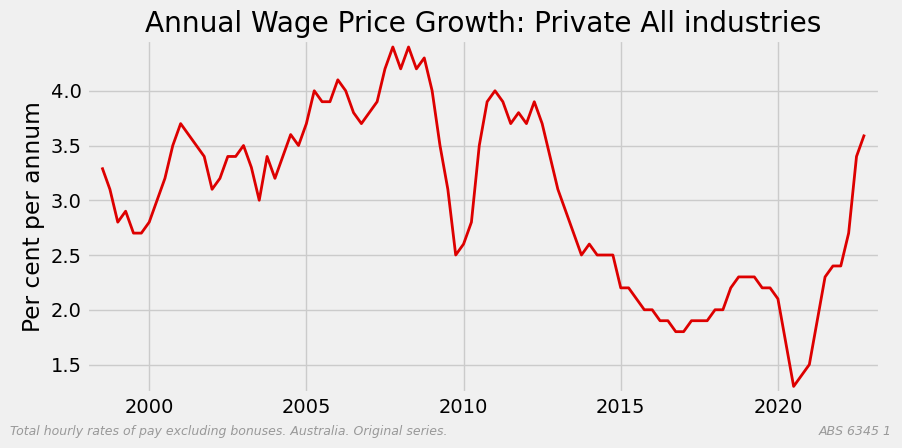

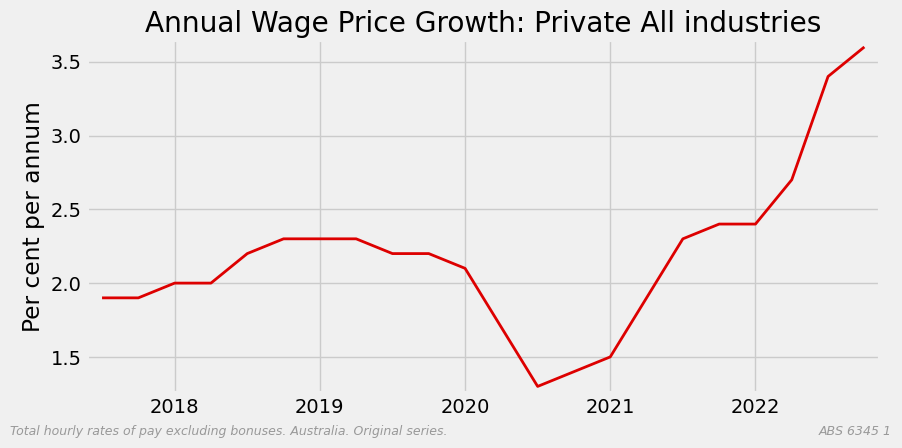

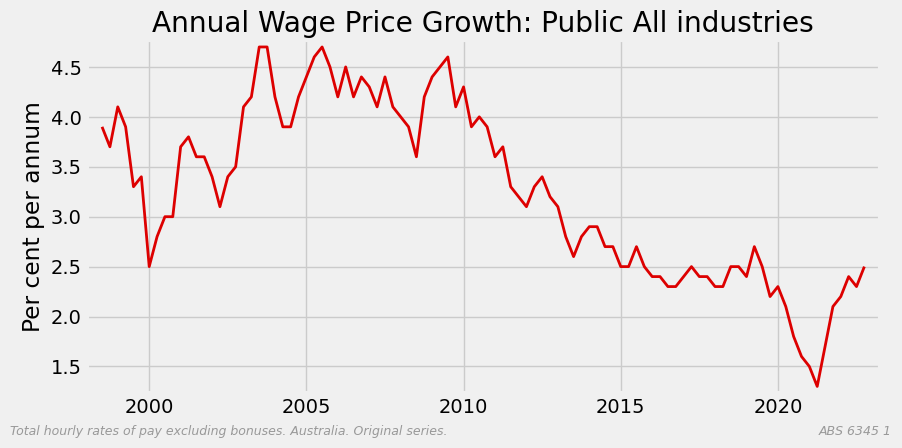

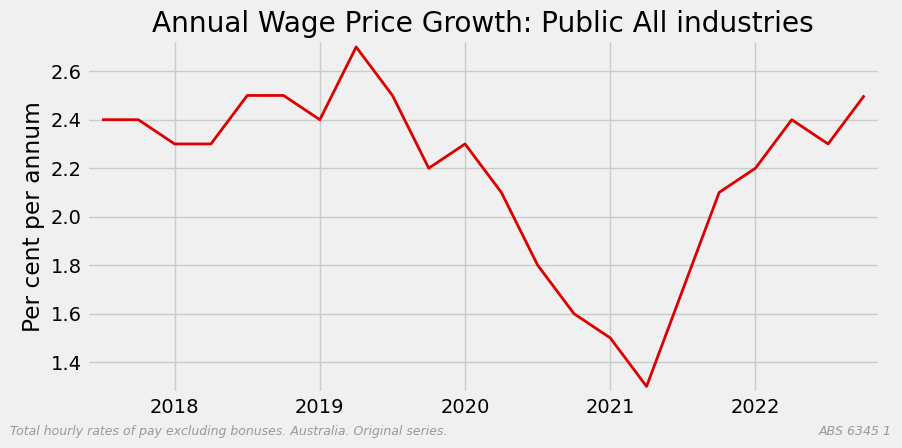

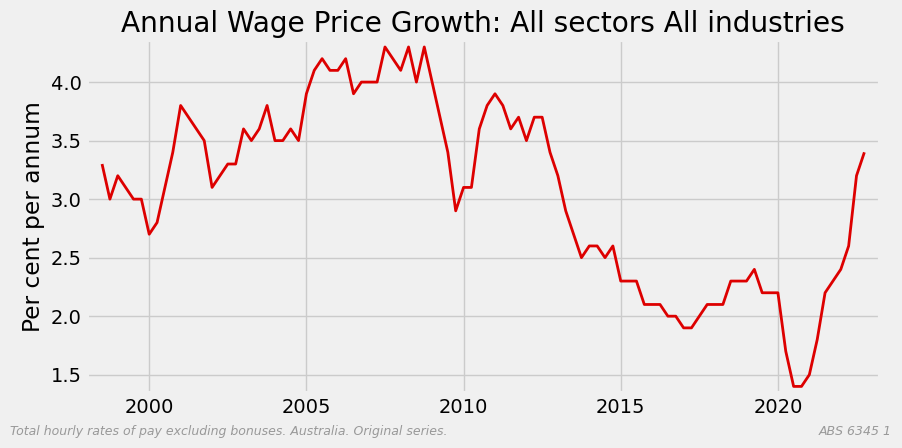

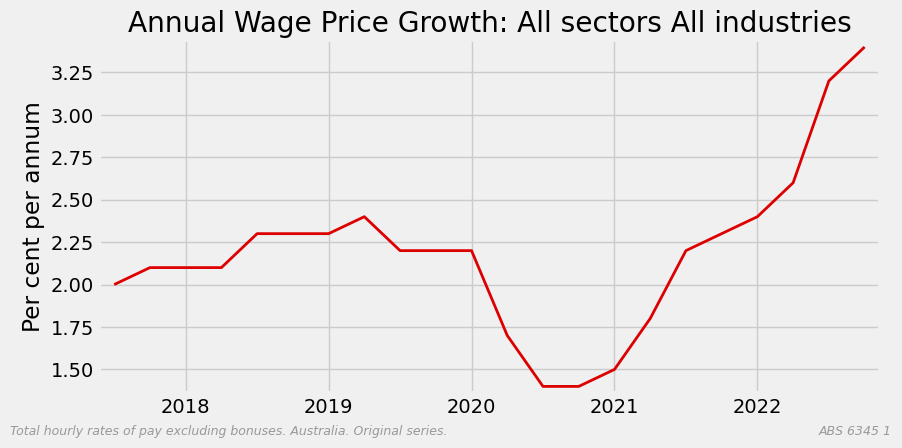

In [5]:
table = "1"
data = abs_dict[table]
series_type = "Original"
select = "Percentage Change from Corresponding Quarter of Previous Year"
selected = meta[
    (meta[table_col] == table)
    & (meta[type_col] == series_type)
    & meta[did_col].str.contains(select)
]

text = "Total hourly rates of pay excluding bonuses ;  Australia"
dict = {}  # used for public v private comparative charts below

for series_id, desc in zip(selected[id_col], selected[did_col]):
    # get the title
    title = (
        desc.replace(select, "")
        .replace(text, "")
        .replace(";", "")
        .replace("Private and Public", "All sectors")
        .strip()
    )
    title = re.sub(" +", " ", title)
    series = data[series_id].dropna()
    dict[title] = series

    line_plot(
        series,
        starts=plot_times,
        tags=plot_tags,
        title=f"Annual Wage Price Growth: {title}",
        ylabel="Per cent per annum",
        rfooter=f"{source} {table}",
        lfooter=f'{text.replace(" ; ", ".")}. {series_type} series.',
        show=SHOW,
    )

### WPI Public vs Private comparative charts

Around 77% of paid wages are in the private sector.

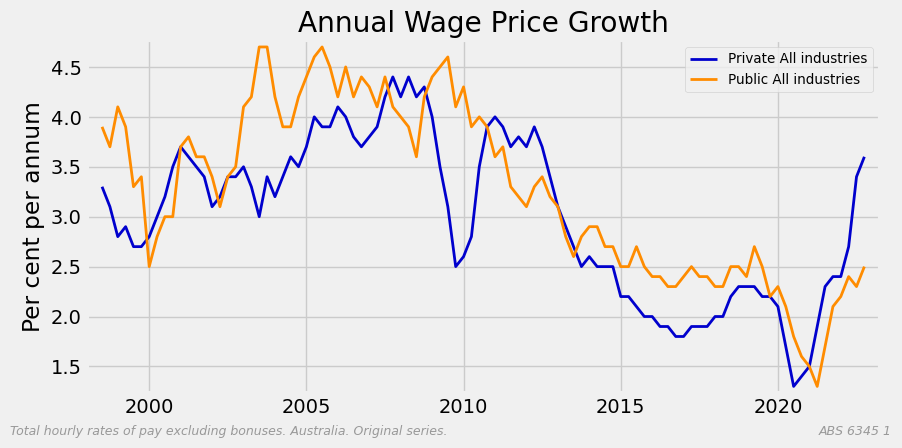

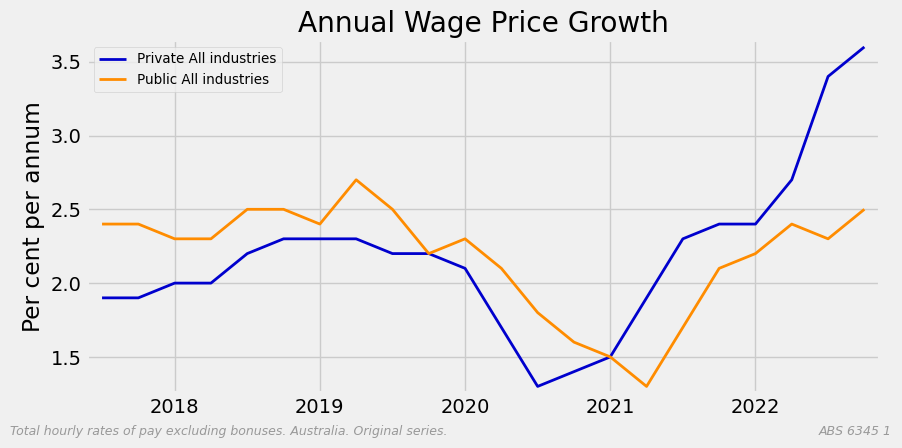

In [6]:
plot_data = pd.DataFrame(dict)
title = "Annual Wage Price Growth"
line_plot(
    plot_data[plot_data.columns[:2]],
    starts=plot_times,
    tags=plot_tags,
    title=title,
    ylabel="Per cent per annum",
    rfooter=f"{source} {table}",
    lfooter=f'{text.replace(" ; ", ".")}. {series_type} series.',
    show=SHOW,
)

## WPI Growth Charts

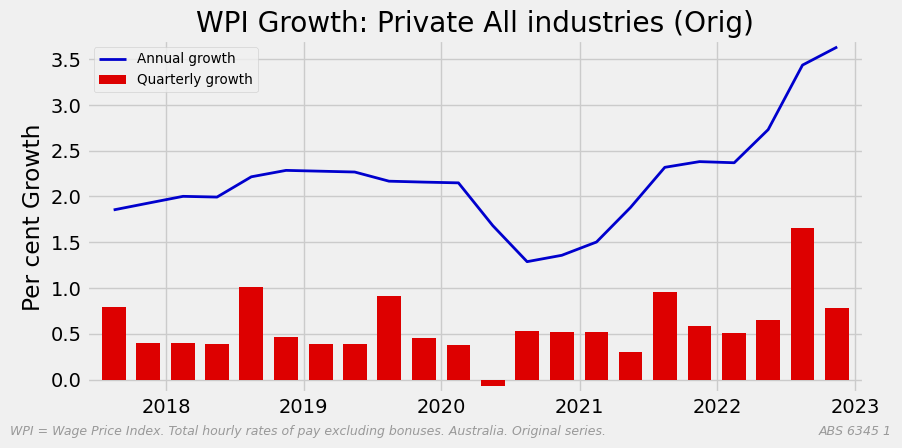

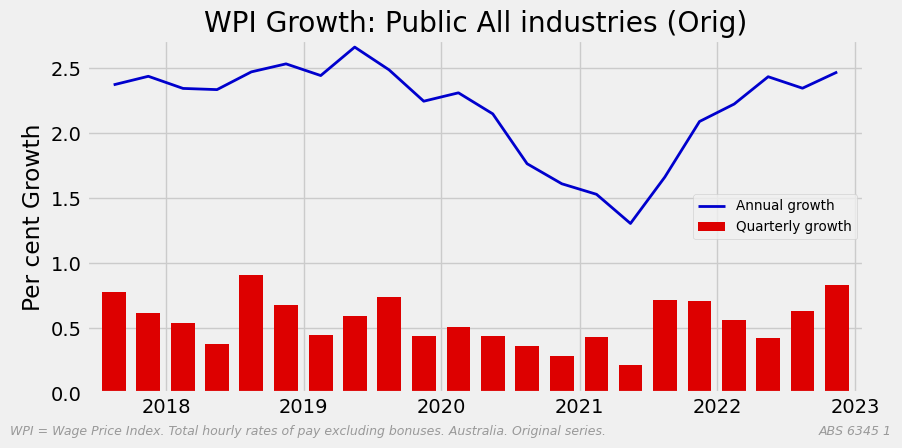

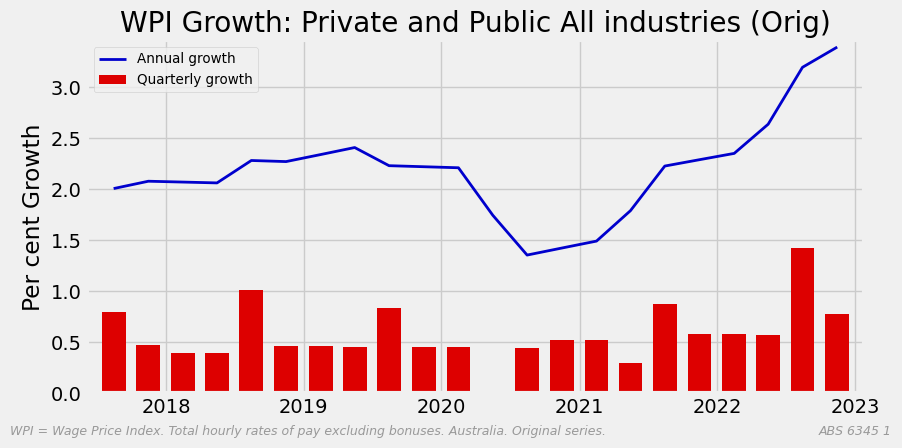

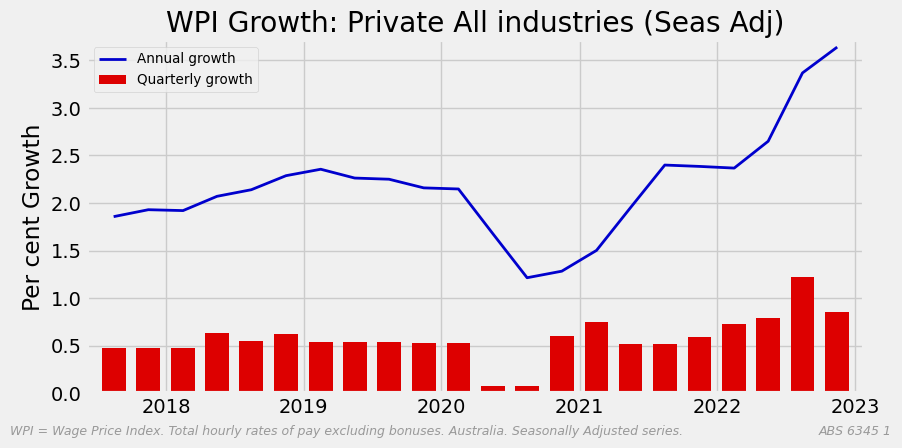

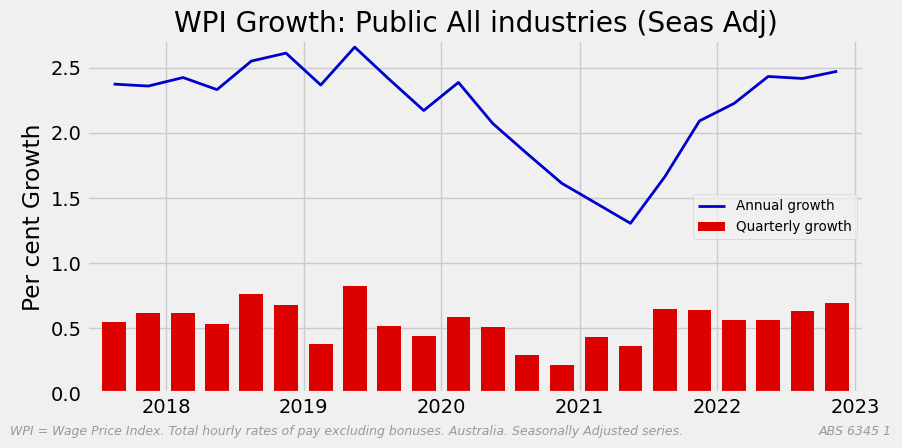

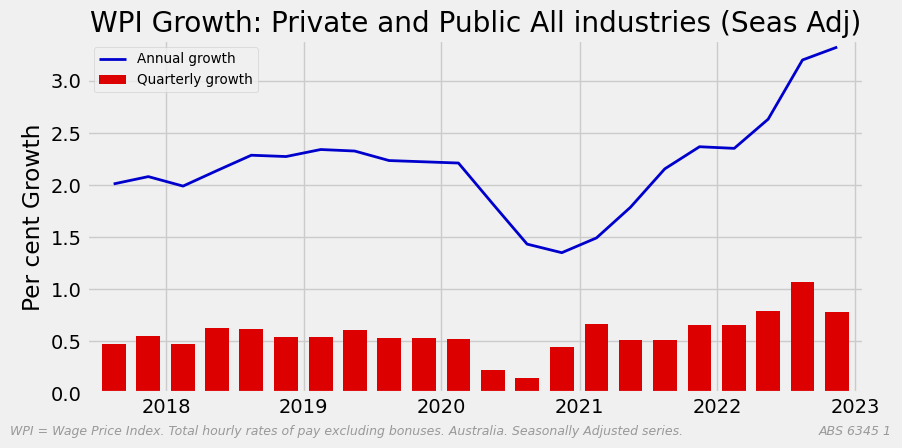

In [7]:
table = "1"
data = abs_dict[table]

for series_type in ("Original", "Seasonally Adjusted"):
    select = "Index"
    selected = meta[
        (meta[table_col] == table)
        & (meta[type_col] == series_type)
        & meta[did_col].str.contains(select)
    ]
    for title, series_id in zip(selected[did_col], selected[id_col]):
        title = title.replace(
            "Quarterly Index ;  Total hourly rates "
            "of pay excluding bonuses ;  Australia ;  ",
            "",
        )
        title = title.replace(" ;", "")
        title = title.replace("  ", " ")
        type_txt = {"Original": "Orig", "Seasonally Adjusted": "Seas Adj"}[series_type]
        title = f"WPI Growth: {title} ({type_txt})"
        series = data[series_id]
        growth = calc_growth(series)
        plot_growth_finalise(
            *growth,
            from_=pd.Period(plot_times[1], freq="Q"),
            title=title,
            rfooter=f"{source} {table}",
            lfooter="WPI = Wage Price Index. "
            f'{text.replace(" ; ", ".")}. {series_type} series. ',
            show=SHOW,
        )

## Finished

In [8]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Wed May 10 2023 21:17:06

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.13.2

re        : 2.2.1
sys       : 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]
matplotlib: 3.7.1
pandas    : 2.0.1

Watermark: 2.3.1



In [9]:
print("Finished")

Finished
